## *Analysis of Climate and Agriculture Worldwide*
### *Fall 2025 Data Science Project*
*Jilin Feng*

### *1. Contribution*
Jilin Feng

### *2. Introduction*
*Climate change is reshaping agricultural productivity across the world, affecting food security, economic stability, and the livelihoods of billions of people. Understanding how climate variables—such as temperature, precipitation, and extreme weather—interact with agricultural inputs is essential for predicting crop yields and planning future adaptation strategies.*

*This project analyzes worldwide agricultural and climate data to explore how environmental, economic, and farm-management factors influence crop yield. Using machine learning techniques, including linear regression and Random Forest regression. The model is able to identify which features are most strongly associated with crop productivity and to evaluate how effectively these models can predict yield.*

*By combining exploratory analysis with predictive modeling, this project provides insights into the complex relationship between global climate patterns and agricultural outcomes.*


In [74]:
# Imports

# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### *3. Data Curation*

*To begin the analysis, we import the global climate–agriculture dataset.* 
*We want to have a few rows displayed to observe the dataset. And this is for later work where we clean and organize the data.*

Link to the dataset: https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture 

In [75]:
# Part 1: (a) Import
# Loading CSV file to dataframe
df = pd.read_csv("climate_change_impact_on_agriculture_2024.csv")
print("Preview of raw data:")
display(df.head())

Preview of raw data:


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


*Now that we know what columns exists, we convert all numerical fields to proper numeric types using **pd.to_numeric**. We then assign some columns as "category" using **astype**.*

In [76]:
# Part 1: (b) Parse
# Data Preprocessing
numeric_cols = [
    'Year', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
    'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%',
    'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
    'Economic_Impact_Million_USD'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

categorical_cols = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']
for col in categorical_cols:
    df[col] = df[col].astype('category')

*Missing numerical values are not great to present in our dataset. I substituted in the mean of each column to replace the missing numerical data.*

*Just to ensure that the datset doesn't include any duplicated rows, we apply **drop_duplicates()**.*

In [77]:
# Part 1: (c) Organize
# Data Preprocessing
print("\nMissing values per column:")
print(df.isnull().sum())

# Substitute mean
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))
# Drop duplicate
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

print("\nDataFrame Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe(include='all'))


Missing values per column:
Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Year                         10000 non-null  int64   
 1   Country                      10000 non-null  category
 2   Region                       10000 non-null  category
 3   Crop_Type                    10000 non-

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
count,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,10,34,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,Australia,South,Wheat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Management,NaN
freq,NaN,1032,754,1047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2049,NaN
mean,2007.088700,NaN,NaN,NaN,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,NaN,674.269658
std,10.084245,NaN,NaN,NaN,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,NaN,414.591431
min,1990.000000,NaN,NaN,NaN,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,NaN,47.840000
25%,1999.000000,NaN,NaN,NaN,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,NaN,350.545000
50%,2007.000000,NaN,NaN,NaN,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,NaN,583.920000
75%,2016.000000,NaN,NaN,NaN,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,NaN,917.505000


### *4. Exploratory Data Analysis*

***Method 1 — Correlation Plot***

*We use a scatterplot with a fitted regression line to explore the relationship between average temperature and crop yield. Each point represents a data entry from the global dataset.* 

*The regression line helps visualize any overall trend between the two variables.*

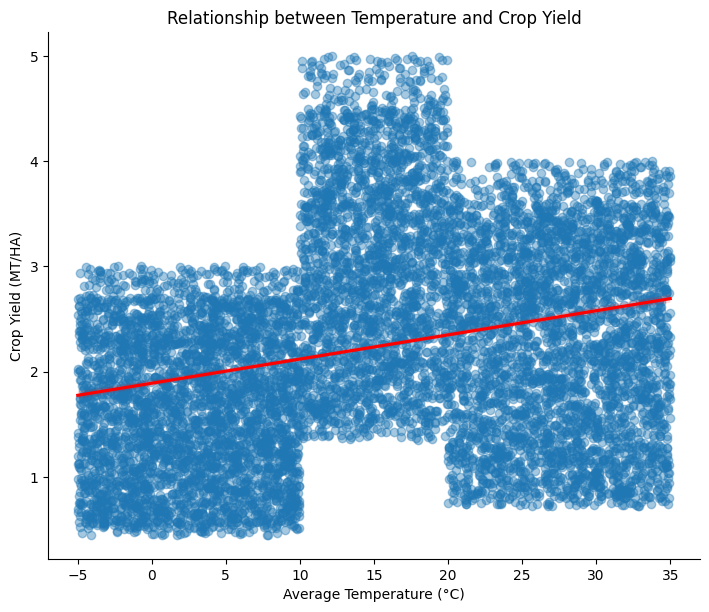

In [78]:
# Part 2: Method 1 - Correlation

sns.lmplot(data=df, x="Average_Temperature_C", y="Crop_Yield_MT_per_HA",
           scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, height=6, aspect=1.2)
plt.title("Relationship between Temperature and Crop Yield")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Crop Yield (MT/HA)")
plt.show()

***Conclusion 1:***
> *The scatterplot shows a slight positive correlation between average temperature and crop yield. This suggests that, within the observed range, moderate temperature increases may enhance productivity for certain crops. However, because the data is highly dispersed, this trend is weak and may depend on crop type and regional factors.*

***Method 2 — Descriptive Statistics (Histogram)***

*Here, we plot a histogram to examine how often different levels of extreme weather events occur across all regions. This visualization shows the overall distribution of extreme climate events and helps identify whether certain event counts are more common than others.*

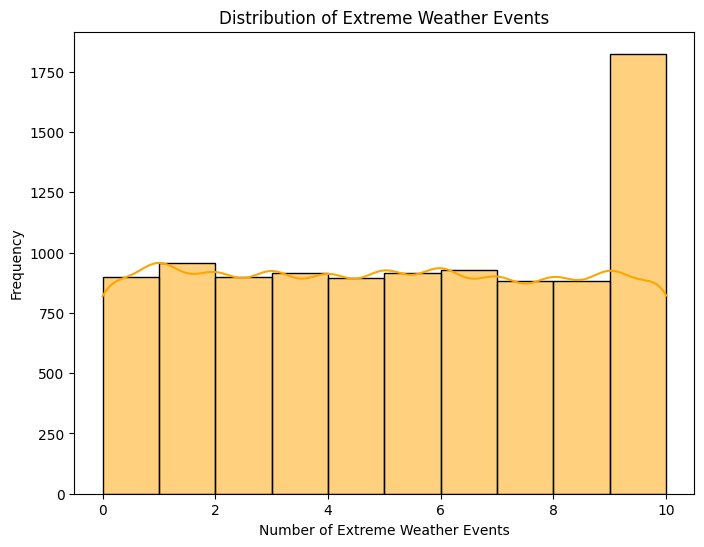

In [79]:
# Part 2: Method 2 - Descriptive Statistics

plt.figure(figsize=(8,6))
sns.histplot(df['Extreme_Weather_Events'], bins=10, kde=True, color='orange')
plt.title("Distribution of Extreme Weather Events")
plt.xlabel("Number of Extreme Weather Events")
plt.ylabel("Frequency")
plt.show()


***Conclusion 2:***
> *The distribution of Extreme Weather Events is generally uniform, suggesting that extreme weather affects agricultural regions across all event frequencies rather evenly. However, the spike at 10 events indicates that a subset of regions faces recurrent or clustered climate shocks more frequently than others. This implies that while climate volatility is widespread, certain high-risk areas experience disproportionately severe exposure, which may require targeted adaptation strategies.*

***Method 3 — Hypothesis Testing (Two-Sample t-test)***

*To investigate whether climate adaptation practices are associated with changes in CO₂ emissions, we divide the data into two groups: regions that use an adaptation strategy and regions that do not.*
*We compare the average CO₂ emissions in these groups using a two-sample t-test. Before the test, we visualize the distributions using a boxplot to see how emissions vary across different adaptation strategies.*

***Hypothesis Question:*** Is there a significant difference in average CO2 emissions between regions that adopt adaptation strategies and those with no adaptation?

***Null Hypothesis:*** There is no significant difference in mean CO2 emissions between regions with and without adaptation strategies.

***Alternative Hypothesis:*** There is a significant difference in mean CO2 emissions between regions with and without adaptation strategies.


/tmp/ipykernel_2539/4100182975.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


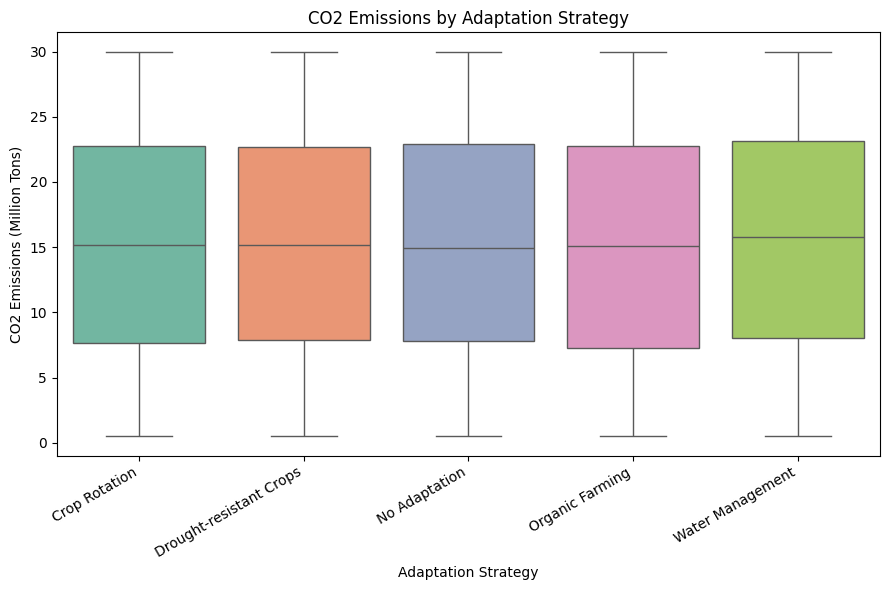

T-statistic: 0.205
P-value: 0.83769

Mean CO2 (With Adaptation): 15.26
Mean CO2 (No Adaptation): 15.21

Result: Fail to reject the null hypothesis.
No statistically significant difference was found in mean CO2 emissions between the two groups.


In [80]:
# Part 2: Method 3 - Hypothesis Testing (t-test)

# Is there a significant difference in average CO2 emissions between regions
# that adopt adaptation strategies and those with no adaptation?

# Null Hypothesis:
# There is no significant difference in mean CO2 emissions between regions
# with and without adaptation strategies.

# Alternative Hypothesis:
# There is a significant difference in mean CO2 emissions between regions
# with and without adaptation strategies.

df["CO2_Emissions_MT"] = pd.to_numeric(df["CO2_Emissions_MT"], errors="coerce")

# Define two groups:
# Group 1: Regions WITH adaptation (all strategies except "No Adaptation")
# Group 2: Regions WITHOUT adaptation ("No Adaptation")
group_adapt = df[df["Adaptation_Strategies"] != "No Adaptation"]["CO2_Emissions_MT"]
group_none = df[df["Adaptation_Strategies"] == "No Adaptation"]["CO2_Emissions_MT"]

# Remove missing values
group_adapt = group_adapt.dropna()
group_none = group_none.dropna()

# Boxplot comparison
plt.figure(figsize=(9,6))
sns.boxplot(
    data=df[df["Adaptation_Strategies"].isin(["No Adaptation", "Drought-resistant Crops",
                                              "Organic Farming", "Crop Rotation", "Water Management"])],
    x="Adaptation_Strategies",
    y="CO2_Emissions_MT",
    palette="Set2"
)
plt.title("CO2 Emissions by Adaptation Strategy")
plt.xlabel("Adaptation Strategy")
plt.ylabel("CO2 Emissions (Million Tons)")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Two-sample t-test
t_stat, p_val = stats.ttest_ind(group_adapt, group_none, equal_var=False, nan_policy='omit')

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

# Mean comparison
mean_adapt = group_adapt.mean()
mean_none = group_none.mean()
print(f"\nMean CO2 (With Adaptation): {mean_adapt:.2f}")
print(f"Mean CO2 (No Adaptation): {mean_none:.2f}")

alpha = 0.05
if p_val < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("There is a statistically significant difference in mean CO2 emissions.")
    print("Regions adopting adaptation strategies tend to have lower CO2 emissions on average.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("No statistically significant difference was found in mean CO2 emissions between the two groups.")

***Conclusion 3:***
> *Although the CO₂ emission distributions technically differ across adaptation strategies (as shown by slight differences in mean values), all five groups share nearly identical shapes, spreads, and quartiles. This results in boxplots that appear visually similar. The large standard deviation (~8.5) relative to the small differences in means causes heavy overlap across groups, making it difficult to distinguish categories visually. Despite the visual similarity, the statistical t-test can still detect small mean differences because it is sensitive to subtle shifts when sample sizes are large.*

### *5. Primary Analysis*

*Before selecting which machine learning models to use, it is important to understand whether simple linear relationships existed between key climate variables and crop yield. To do this, I plotted scatterplots with regression lines for two highly relevant predictors: average temperature and total precipitation.*

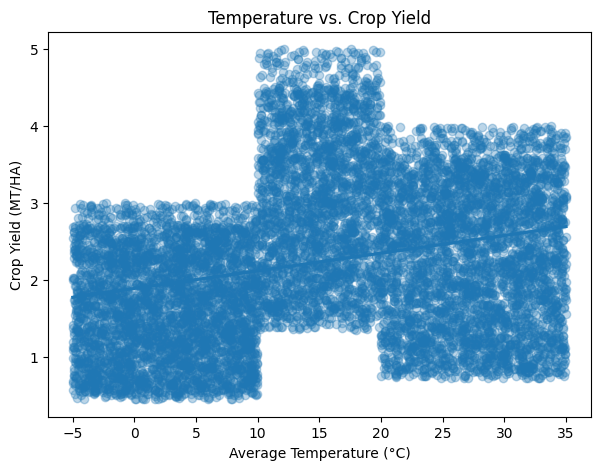

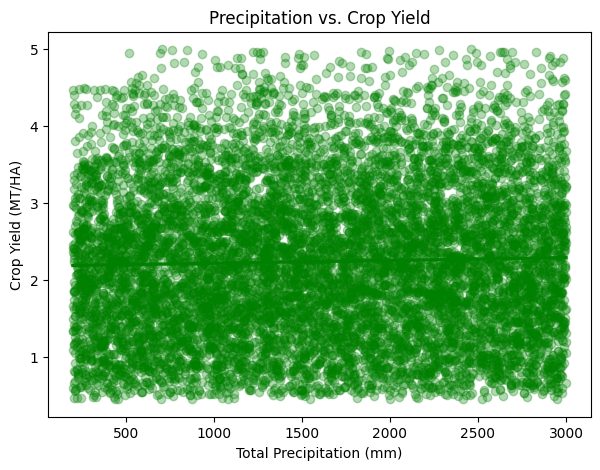

In [81]:
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Average_Temperature_C", y="Crop_Yield_MT_per_HA", scatter_kws={'alpha':0.3})
plt.title("Temperature vs. Crop Yield")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Crop Yield (MT/HA)")
plt.show()

plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Total_Precipitation_mm", y="Crop_Yield_MT_per_HA", scatter_kws={'alpha':0.3}, color='green')
plt.title("Precipitation vs. Crop Yield")
plt.xlabel("Total Precipitation (mm)")
plt.ylabel("Crop Yield (MT/HA)")
plt.show()


> *The first plot (Temperature vs. Crop Yield) helps visualize whether crop yield increases or decreases with temperature. The slight upward trend in the regression line suggests a weak positive correlation, but the large amount of scatter indicates that temperature alone cannot reliably predict yield.*

> *The second plot (Precipitation vs. Crop Yield) shows a similar pattern. Although some trend exists, the data remains highly dispersed, suggesting that precipitation also has a nonlinear or multi-factor influence on yield.*

> *Both of these findings suggests a weak linear structure and the significant spread implies that:*

- *Linear Regression can serve as a baseline model, since there is some linear trend.*

- *A more flexible model is needed, because the high dispersion indicates nonlinear interactions between variables.*

- *Random Forest Regression is appropriate, since it can capture nonlinear effects, interactions, and complex variable relationships that the scatterplots hint at but do not reveal fully.*

*To prepare the dataset for machine learning, I first identified the target variable, Crop_Yield_MT_per_HA, which represents the crop productivity we want to predict. I then selected a set of relevant features based on climate, agricultural inputs, and regional factors. These include temperature, precipitation, CO₂ emissions, extreme weather events, irrigation access, fertilizer and pesticide usage, soil health, economic impact, and several categorical variables such as country, region, crop type, and adaptation strategies.*

*Selecting a broad set of features ensures that the model receives enough information to capture both environmental conditions and management practices, which together influence crop yield. Including both numeric and categorical predictors provides a more complete representation of global agricultural systems.*

In [82]:
# Feature Selection
target = "Crop_Yield_MT_per_HA"

features = [
    'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
    'Extreme_Weather_Events','Irrigation_Access_%','Pesticide_Use_KG_per_HA',
    'Fertilizer_Use_KG_per_HA','Soil_Health_Index','Economic_Impact_Million_USD',
    'Country','Region','Crop_Type','Adaptation_Strategies'
]

X = df[features]
y = df[target]

*After defining the feature matrix (X) and the target vector (y), I split the data into training and test sets using an 80/20 ratio. The training set is used to fit the machine learning models, while the test set provides an unbiased evaluation of model performance on unseen data. This separation is essential for preventing overfitting and ensuring that the final model generalizes well.*

In [83]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

categorical_cols = ['Country','Region','Crop_Type','Adaptation_Strategies']
numeric_cols = [c for c in X.columns if c not in categorical_cols]

*Because the dataset contains a mix of numerical and categorical variables, preprocessing is required before feeding the data into machine learning models. Numerical features can be used directly, but categorical features need to be converted into numerical form. To accomplish this, I created a preprocessing pipeline using ColumnTransformer: numerical columns pass through unchanged, while categorical columns are transformed using one-hot encoding.*

*One-hot encoding turns each category—such as crop type or adaptation strategy—into binary indicator columns, allowing both linear regression and random forest models to incorporate these variables effectively. Including this preprocessing pipeline ensures consistent handling of data and prevents errors during model training.*

In [84]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

*To establish a baseline model, I first applied Linear Regression. This model assumes a straight-line relationship between the input features and crop yield. Although agricultural systems are complex and often nonlinear, linear regression is a useful starting point because it is easy to interpret and helps reveal whether simple linear patterns exist in the data.*

*I used a pipeline that includes the previously defined preprocessing step, which ensures that numerical features are passed through unchanged and categorical variables are one-hot encoded. This allows the linear model to incorporate both climate variables and categorical factors such as region, crop type, and adaptation strategies.*

*After training the model on the training set, I evaluated its performance using three common regression metrics: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (coefficient of determination). These metrics indicate how well the model predicts crop yield on unseen data. In this case, Linear Regression produced relatively modest accuracy, suggesting that the relationship between the features and crop yield is not strictly linear.*

*This baseline performance is important because it highlights the limitations of a simple linear approach and motivates the use of a more flexible model—such as Random Forest Regression—that can capture nonlinear interactions and complex patterns present in global agricultural data.*

In [85]:
# Linear Regression Model
linear_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

rmse_lr, mae_lr, r2_lr = evaluate(y_test, y_pred_lr)
print("Linear Regression Results:")
print(f" RMSE: {rmse_lr:.3f}")
print(f" MAE : {mae_lr:.3f}")
print(f" R²  : {r2_lr:.3f}")

Linear Regression Results:
 RMSE: 0.681
 MAE : 0.546
 R²  : 0.560


*After establishing a baseline with Linear Regression, I applied Random Forest Regression as a more advanced model. Random Forests are ensemble methods that build many decision trees and combine their predictions, which allows the model to capture nonlinear relationships, interaction effects, and complex structure that linear regression cannot represent.*

*I used the same preprocessing pipeline as before, ensuring that numerical features are passed through directly while categorical features are encoded using one-hot encoding.*

*Once trained, the model was evaluated on the test data using RMSE, MAE, and R²— the same metrics used for the linear model.*

In [86]:
# Random Forest Regression
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,  
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf, mae_rf, r2_rf = evaluate(y_test, y_pred_rf)
print("Random Forest Regression Results:")
print(f" RMSE: {rmse_rf:.3f}")
print(f" MAE : {mae_rf:.3f}")
print(f" R²  : {r2_rf:.3f}")

Random Forest Regression Results:
 RMSE: 0.627
 MAE : 0.504
 R²  : 0.627


> *Like expected, Random Forest Regression achieved significantly better scores, indicating that it captured more of the underlying patterns connecting climate variables, agricultural practices, and crop yield.*

> *This improvement confirms that crop yield is influenced by nonlinear interactions between features. The superior performance of the Random Forest model demonstrates why a flexible, tree-based ensemble approach is better suited for this type of global agricultural data.*

### *6. Visualization*

*This bar chart compares the performance of Linear Regression and Random Forest Regression using three standard evaluation metrics: RMSE, MAE, and R². For RMSE and MAE, lower values indicate better predictive accuracy, while for R² higher values indicate more variance explained by the model.*

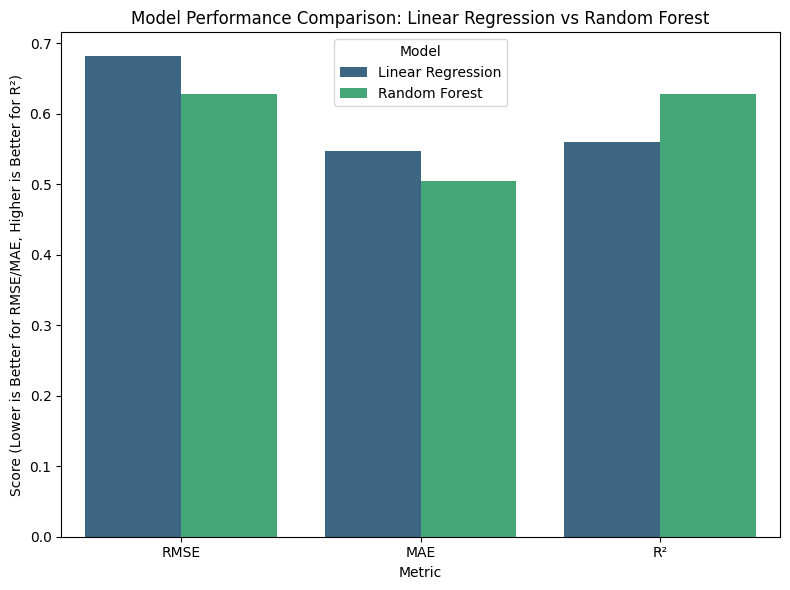

In [87]:
# Comparison of Evaluation Metrics: Linear vs Random Forest

metrics_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "R²"],
    "Linear Regression": [rmse_lr, mae_lr, r2_lr],
    "Random Forest": [rmse_rf, mae_rf, r2_rf]
})

metrics_df_melted = metrics_df.melt(id_vars="Metric", 
                                    var_name="Model", 
                                    value_name="Score")

plt.figure(figsize=(8,6))
sns.barplot(data=metrics_df_melted, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Model Performance Comparison: Linear Regression vs Random Forest")
plt.ylabel("Score (Lower is Better for RMSE/MAE, Higher is Better for R²)")
plt.tight_layout()
plt.show()

> *The plot clearly shows that the Random Forest model outperforms Linear Regression across all metrics. Random Forest achieves lower RMSE and MAE, meaning its predictions are consistently closer to actual crop yields. It also achieves a higher R², indicating that it captures more of the underlying variability in the data. This visualization provides a clear, intuitive summary of why Random Forest is the more effective model for this prediction task.*


*However, we confirm our model, we should look at the key features to assure that the top features make sense. This is because our model uses one-hot encoding for categorical variables, such as Country, Region, Crop Type, and Adaptation Strategy. One-hot encoding expands each category into several new binary columns, which means the model trains on many more features than were originally present. By retrieving these encoded feature names, we ensure that each importance score is correctly matched to the specific feature the model learned from.*


In [88]:
# Extract feature names after one-hot encoding
encoded_features = (
    numeric_cols
    + list(rf_model.named_steps["preprocessor"]
      .transformers_[1][1]
      .get_feature_names_out(categorical_cols))
)

*And we visualize this using bar graph. The feature importance bar plot displays the top 15 most influential predictors used by the Random Forest regression model. The y-axis lists the feature names, including both numeric variables (e.g., Soil Health Index, Fertilizer Use) and one-hot encoded categories. The x-axis shows the importance score, which measures how much each feature contributed to reducing prediction error across the Random Forest’s decision trees. Higher values indicate that the model relied more heavily on that feature when predicting crop yield.*


/tmp/ipykernel_2539/2168136359.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


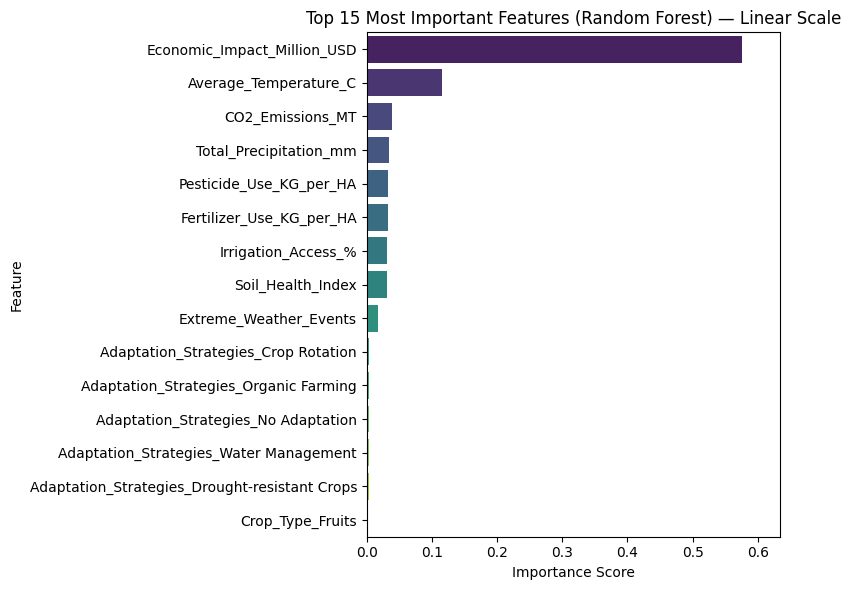

In [89]:
# Feature importances
importances = rf_model.named_steps["regressor"].feature_importances_
importance_df = pd.DataFrame({
    "Feature": encoded_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.xlim(0, importance_df["Importance"].max() * 1.1)
plt.title("Top 15 Most Important Features (Random Forest) — Linear Scale")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

*To provide additional clarity, we also include a log-scale version of the plot. A linear x-axis highlights the dominant predictors but compresses lower importance values, making smaller features difficult to compare. Using a logarithmic scale spreads out the lower end of the distribution, allowing us to see subtle differences among the features that the model used less frequently. Together, the two plots reveal both the major drivers of crop yield and the long tail of minor but still relevant variables.*

/tmp/ipykernel_2539/1187585059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


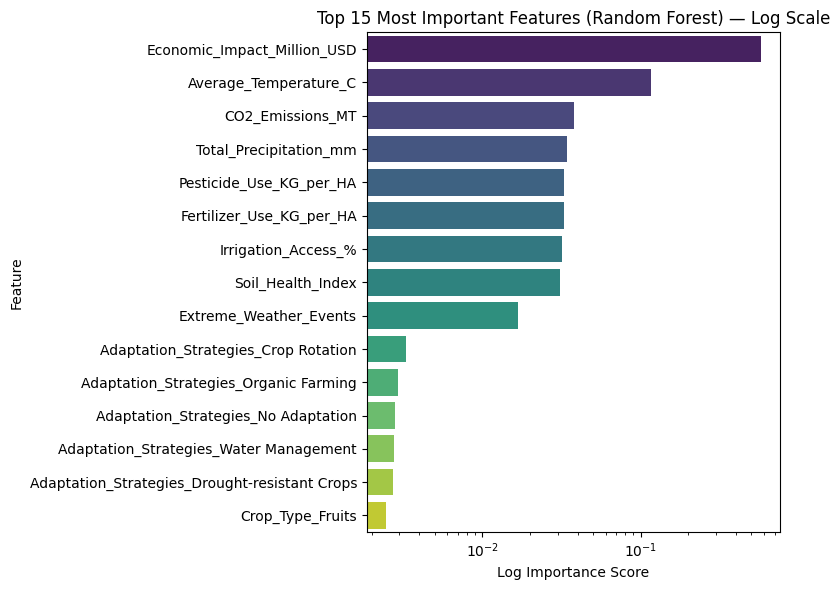

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.xscale("log")
plt.title("Top 15 Most Important Features (Random Forest) — Log Scale")
plt.xlabel("Log Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

> *From the feature importance results, we can see that the strongest predictors of crop yield are primarily the numeric agricultural and environmental variables—such as average temperature, CO2 emissions, total precipitation, soil health index, irrigation access, fertilizer use, and total precipitation. These make intuitive sense because they directly affect plant growth and farming productivity across regions. In contrast, most one-hot encoded categorical features (such as individual countries or crop types) show much smaller importance values. This is reasonable: each category represents only a small portion of the dataset, so the model distributes their influence across many indicator variables rather than relying heavily on any single one. Together, the results suggest that while geographic and crop-type differences do contribute context, the main drivers of yield prediction are measurable physical and resource-related factors that universally affect agriculture.*

*To visualize how well the model predicts crop yield, I created an “Actual vs Predicted” scatterplot. In this graph, each point represents a single observation from the test set (a specific region–year–crop combination). The x-axis shows the actual crop yield, while the y-axis shows the predicted crop yield.*

*If the model were perfect, all points would lie exactly on the diagonal line where predicted = actual. A good model will produce points that cluster closely around this diagonal. In contrast, a poor model would generate a wide, disorganized cloud of points with no clear trend.*

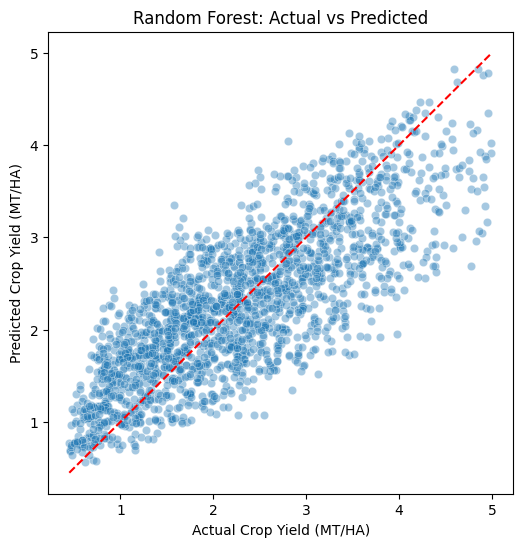

In [91]:
# Predicted vs Actual Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4)
plt.xlabel("Actual Crop Yield (MT/HA)")
plt.ylabel("Predicted Crop Yield (MT/HA)")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.show()

> *In this project, the scatterplot shows a clear diagonal trend, indicating that the Random Forest model is able to learn meaningful patterns and produce predictions that follow the general shape of the true data. Importantly, the plot also reveals that the model does not exhibit major systematic bias—it does not consistently overpredict or underpredict yield across the entire range of observations.*

### *7. Insights and Conclusions*

*This project investigated how climate conditions, agricultural practices, and economic factors influence global crop yield, and whether machine learning models can effectively predict agricultural productivity. Through exploratory analysis and regression modeling, several meaningful insights emerged that help both uninformed and knowledgeable readers better understand the relationships within the data.*

*First, the exploratory data analysis showed that climate variables such as temperature and precipitation have only weak linear relationships with crop yield when examined in isolation. The scatterplots displayed broad dispersion, suggesting that crop performance is shaped by complex interactions rather than simple one-to-one effects. This observation helped motivate the use of more flexible models beyond linear regression.*

*Second, the machine learning analysis demonstrated that Random Forest Regression significantly outperformed Linear Regression. The Random Forest model achieved lower RMSE and MAE values and a higher R², indicating a stronger ability to capture the variability in crop yield across different regions and conditions. This confirms that agricultural systems are governed by nonlinear processes—such as interactions between climate, soil health, and economic investment—which tree-based ensemble models are better suited to detect.*

*Third, the feature importance analysis revealed which factors matter most. Economic Impact consistently ranked as the strongest predictor, suggesting that wealthier regions with better agricultural infrastructure tend to achieve higher crop yields. Temperature, precipitation, fertilizer use, and soil health also played substantial roles, aligning with established agronomic knowledge. The log-scale importance plot additionally highlighted smaller yet meaningful contributors such as pesticide use and irrigation access. These findings give readers a grounded understanding of which environmental and management factors most strongly shape crop productivity worldwide.*

*Fourth, visualization tools such as the Actual vs Predicted plot and residual plot provided intuitive confirmation of model quality. The diagonal clustering of points indicated that the Random Forest model reliably follows the structure of the true data without systematic bias. The residual plot showed evenly scattered errors, suggesting that the model generalizes well and does not systematically over- or underpredict yield.*

*Overall, we analyzed the features that affects crop yield and the importance of using appropriate modeling techniques to analyze them.*

*In conclusion, data-driven approaches such as Random Forest Regression can help quantify the impacts of climate and agricultural practices on crop yield. While the model explains a significant portion of yield variability, additional factors—such as local soil conditions, farming equipment, government policies, or crop genetics—could further improve predictive performance. Nonetheless, the findings demonstrate the value of combining climate data, economic indicators, and agricultural inputs to better understand global food production in an era of climate uncertainty.*